In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Improving Regression

- Train/Test Split
- Coding Qualitative Variables
- Polynomial Regression

### Train/Test split

Just like a student learning, we want to assess performance on solving **new** problems.  Accordingly, we aim to assess model performance using data that they have never seen before.  This means we will split our data into two sets:

- **training set**: contains a large random sample of our data used to build model
- **test set**: contains smaller random subset of our data used to assess model

In [2]:
credit = pd.read_csv('data/credit.csv', index_col = 'Unnamed: 0')

In [3]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


### Problems:

1. What is the regression problem here?
2. Select features you consider important and build an OLS model, use MSE and RMSE to evaluate.
3. Use `pandas` sampling methods to construct a **training** dataset containing 75% of your data and a **testing** dataset containing everything else.  
4. Build a model on your training data and assess its MSE and RMSE on the test data.  Did this do better than when you used all the data?  

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x = credit[['Limit']]
y = credit.Balance

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [9]:
x.shape

(400, 1)

In [10]:
x_train.shape

(300, 1)

In [11]:
x_test.shape

(100, 1)

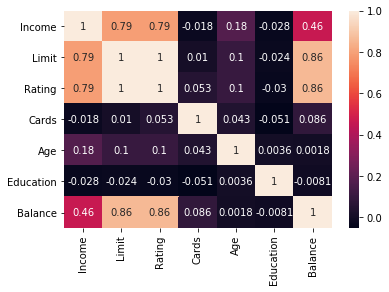

In [15]:
%matplotlib inline
import seaborn as sns

corr = credit.corr()
sns.heatmap(corr, annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018ED85A64E0>,
      dtype=object)

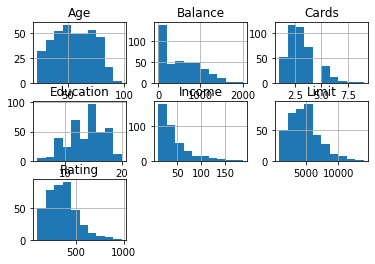

In [16]:
credit.hist()

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr1 = LinearRegression()
lr2 = LinearRegression()

lr1.fit(x,y)
preds = lr1.predict(x)

lr2.fit(x_train, y_train)
preds2 = lr2.predict(x_test)

In [21]:
mean_squared_error(y, preds), np.sqrt(mean_squared_error(y, preds))

(54289.14164778425, 233.00030396500398)

In [22]:
mean_squared_error(y_test, preds2), np.sqrt(mean_squared_error(y_test, preds2))

(47019.26631684667, 216.8392637804479)

### Doing it with `sklearn`

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = credit[['Income']]
y = credit['Balance']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [26]:
lr = LinearRegression()

In [27]:
#the machine learning way
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
np.sqrt(mean_squared_error(pred, y_test))

387.37622629351864

### Pushing Further

![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [28]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()

In [31]:
cross_val_score(lr, x_train, y_train, cv = 5, scoring = 'neg_mean_squared_error') # cv is how many folds to perform

array([-53383.3588528 , -49394.78022209, -74717.98824369, -68342.60685392,
       -44076.41324427])

In [34]:
baseline = np.ones(y_train.shape)*y.mean()

In [35]:
baseline.shape

(300,)

In [36]:
mean_squared_error(y_train, baseline)

201200.42859166666

In [37]:
np.sqrt(mean_squared_error(y_train, baseline))

448.5537075888089

In [39]:
np.sqrt(np.abs(cross_val_score(lr, x_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')))

array([231.04839072, 222.24936495, 273.34591316, 261.4241895 ,
       209.94383355])

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [33]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

### Qualitative Features

To this point, we've only examined quantitative features.  Here, we follow an example where we can incorporate some qualitative features into our analysis.  In our dataset below, we have four variables that are qualitative:

    Gender, Student, Married, Ethnicity
    
We begin by considering the relationship between `Gender` and `Balance`.

In [40]:
credit = pd.read_csv('data/credit.csv', index_col = 'Unnamed: 0')

In [41]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 37.5+ KB


In [42]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [44]:
credit.Ethnicity.value_counts()

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64

In [45]:
#lm = smf.ols('Balance ~ Gender', data = credit).fit()
X = credit[['Gender']]
y = credit['Balance']

In [46]:
lm = LinearRegression()
lm.fit(X, y)

ValueError: could not convert string to float: ' Male'

In [13]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [14]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 37.5+ KB


In [47]:
dums = pd.get_dummies(credit, drop_first=True)

In [48]:
dums.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
1,14.891,3606,283,2,34,11,333,0,0,1,0,1
2,106.025,6645,483,3,82,15,903,1,1,1,1,0
3,104.593,7075,514,4,71,11,580,0,0,0,1,0
4,148.924,9504,681,3,36,11,964,1,0,0,1,0
5,55.882,4897,357,2,68,16,331,0,0,1,0,1


In [17]:
X = dums[['Income', 'Education', 'Rating', 'Age', 'Gender_Female', 'Married_Yes']]
y = dums['Balance']
lr = LinearRegression()
lr.fit(X, y)
pred = lr.predict(X)
np.sqrt(mean_squared_error(pred, y))

160.4895085112792

In [23]:
credit['Gender'].value_counts()

Female    207
 Male     193
Name: Gender, dtype: int64

In [24]:
gender_dummies = pd.get_dummies(credit.Gender, drop_first=True)

In [25]:
gender_dummies.columns

Index(['Female'], dtype='object')

In [26]:
gender_dummies.head()

,Female
1,0
2,1
3,0
4,1
5,0


In [27]:
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(gender_dummies['Female'].values.reshape(-1,1), credit['Balance'])
predictions = lr.predict(gender_dummies['Female'].values.reshape(-1,1))
mse = mean_squared_error(predictions, credit.Balance)
print(mse)

210752.54999098898


In [28]:
np.sqrt(mse)

459.0779345503212

In [29]:
lr.coef_

array([19.73312308])

In [30]:
lr.intercept_

509.8031088082901

### Interpretation and Dummy Variables

The idea above is that the equation can be understood as the intercept meaning the average for the 0 category, and the coefficient as the difference between the two categories.  Further, the sum of the intercepts would be the average value for the 1 category.  

As we've discussed, we want to introduce quantitative data to many machine learning algorithms, so we should consider adding a dummy variable for this column.  We can follow our earlier example.

In [49]:
gender_dummies = pd.get_dummies(credit.Gender, prefix='Gender')

In [50]:
gender_dummies.head()

,Gender_ Male,Gender_Female
1,1,0
2,0,1
3,1,0
4,0,1
5,1,0


In [51]:
credit['Gender_Female'] = gender_dummies['Gender_Female']

In [34]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Gender_Female
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0


In [35]:
#gender_model = smf.ols('Balance ~ Gender_Female', data = credit).fit()
#gender_model.summary2()
lm.fit(credit[['Gender_Female']], credit['Balance'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
lm.coef_

array([19.73312308])

#### Problem

Using the `Credit` dataset above, add encoding to the other binary categorical variables.  Fit a basic Linear Model to one or two of these new columns against the `Balance` column.  Interpret your findings in terms of the categories.

### More than two Categories

Here, we need more than one dummy variable and will subsequently run a linear regression on a both of these columns and interpret the data accordingly.  In our credit dataset, we have a three valued column with `Ethnicity`.  From this, we will create a model where:

$$y_i = \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + \epsilon_i $$

where $x_{i1} = 1$ if the $i$th person is Asian and 0 otherwise, and similarly $x_{i2}$ for Caucasian.  Again, this assignment is arbitrary.  However, we can interpret the model as:

- $\beta_0 + \beta_1 + \epsilon_i$: if $i$th person is Asian
- $\beta_0 + \beta_2 + \epsilon_i$: if $i$th person is Caucasian
- $\beta_0 +\epsilon_i$: if $i$th person is African American

In [ ]:
credit['Ethnicity'].value_counts()

In [ ]:
ethn_dummies = pd.get_dummies(credit.Ethnicity)

In [ ]:
ethn_dummies.head()

In [ ]:
credit['ethn_asian'] = ethn_dummies['Asian']
credit['ethn_cauc'] = ethn_dummies['Caucasian']

In [ ]:
lin_tre = smf.ols('Balance ~ ethn_asian + ethn_cauc', data = credit).fit()

In [ ]:
lin_tre.summary2()

We interpret these results as saying that the balance for African Americans is 531.00, the Asian category has 18.69 less than this, and the Caucasian category will carry 12.50 less than the African American category.

### Problem

Examine a multiple regression model on the `Credit` dataset provided after appropriately coding all categorical variables and dealing with any missing values.  Make a single markdown cell containing a scatterplot and the fitted line and the RMSE. (to save a plot you can type `plt.savefig()` and pass a filename for saving the image, subsequently displaying it in a markdown cell with `![](path/to/image.png)`)

### Polynomial Regression

While we see what the relationship between these variables modeled as a straight line would be, but could a polynomial shape do better?  Let's first consider the simple polynomial case.  

In [ ]:
mpg = pd.read_csv('data/mtcars.csv')

In [ ]:
mpg.info()

In [ ]:
plt.figure()
plt.scatter(mpg['hp'], mpg['mpg'])

In [ ]:
lin = np.polyfit(mpg['hp'], mpg['mpg'], 1)
lin_p = np.poly1d(lin)

x = mpg['hp'].sort_values()
plt.plot(x, lin_p(x), label = 'Linear')

In [ ]:
quad = np.polyfit(mpg['hp'], mpg['mpg'], 2)
quad_p = np.poly1d(quad)

plt.plot(x, quad_p(x), label = 'Quadratic')

In [ ]:
many = np.polyfit(mpg['hp'], mpg['mpg'], 14)
big_p = np.poly1d(many)

plt.plot(x, big_p(x), label = 'Degree 14')
plt.legend(frameon = False)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
pipe = make_pipeline(PolynomialFeatures(degree = 2), LinearRegression())

In [ ]:
pipe.fit(X_train, y_train)

In [ ]:
pred = pipe.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(pred, y_test))

**Determining Shape**


One way to look at whether there is a quadratic relationship between variables is to examine the graph of the residuals.  Below, we construct residual plots for the linear and quadratic case that include a fitted line.  Note the lack of pattern in the quadratic fit.

In [ ]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.residplot(mpg['mpg'], mpg['hp'], lowess = True)

plt.subplot(1, 2, 2)
sns.residplot(mpg['mpg'], mpg['hp'], order = 2, lowess = True)

### More than One Polynomial Feature

While a polynomial in 2-Dimensions looks like

$$ y = a_0 + a_1x + a_2x^2 + ... + a_nx^n $$

A quadratic polynomial in 3-Dimensions could look something like:

$$ f(x, y) = ax^2 + bx + cy^2 + dy + exy  + f$$

Note the existence of the $exy$ term, where the variables $x$ and $y$ interact.  We can see something like this in our advertising data.  Let's first create a new column that combines the TV and radio columns through multiplication.  We can consider this in a 2D plot against sales.

In [ ]:
ads['TVradio'] = ads.TV * ads.radio

In [ ]:
ads.head()

In [ ]:
plt.figure()
plt.scatter(ads['TVradio'], ads['sales'])

In [ ]:
quad = np.polyfit(ads.TVradio, ads.sales, 2)

In [ ]:
quad_p = np.poly1d(quad)

In [ ]:
x = ads.TVradio.sort_values()

In [ ]:
plt.plot(x, quad_p(x), color = 'red', linewidth = 5)

We want to include the individual terms that make up the interaction term in our original model.  Thus, we will need a 3D quadratic polynomial for our model in the advertising data.  The smoothest way I know to accomplish this is to us the `PolynomialFeatures` method from scikitlearn.  Below, we create an instance of the `PolynomialFeatures` method, create a single object containing the input variables, and fit these values with the `.fit_transform()` method.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)

In [ ]:
X = ads[['TV', 'radio']]

In [ ]:
X_poly = poly_features.fit_transform(X)

In [ ]:
X_poly[0]

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_poly, ads.sales)

In [ ]:
lin_reg.intercept_

In [ ]:
lin_reg.predict(X_poly)[:10]

In [ ]:
lin_reg.score(X_poly, ads.sales)

### Pipelines and Higher Degree Fits

We could use a higher order polynomial also, examining a degree 3 polynomial with the `Pipeline` approach, combining the two operations together.  We will see much more from piplines moving forward.

In [ ]:
model = Pipeline([('poly', PolynomialFeatures(3)),
                 ('linear', LinearRegression(fit_intercept= False))])

In [ ]:
X = ads[['TV', 'radio']]
y = ads['sales']

In [ ]:
model = model.fit(X, y)

In [ ]:
model.score(X, y)

In [ ]:
ads.plot(x = 'TV', y = 'sales', kind = 'scatter')
plt.scatter(ads['TV'], y = model.predict(X), color = 'red', alpha = 0.2 )

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(y, model.predict(X))

In [ ]:
rmse = np.sqrt(mse)

In [ ]:
rmse

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X, y)
tree_predictions = tree_reg.predict(X)
mse = mean_squared_error(y, tree_predictions)
rmse = np.sqrt(mse)

In [ ]:
mse

In [ ]:
rmse

### Problem

Investigate the use of `PolynomialFeatures` on the `Credit` dataset.  Does a cubic polynomial significantly improve performance?